# Kickstarter Projects Analysis  

In here, all analysis will take place, as well as explanations.

In [0]:
# Import required libraries for analysis

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import sklearn
import numpy as np
from pyspark.sql.functions import col, sum

## Step 1 - Data Loading and Inspection  

To start with, it's important to first check the table, get information on each column and see it's breakdown and to get an idea of the depth of the data we have to work with.

In [0]:
df = spark.read.csv('/Volumes/workspace/default/de_data/kickstarter_projects.csv', header=True, inferSchema=True)
display(df)

ID Name Category Subcategory Country Launched Deadline Goal Pledged Backers State 1860890148 Grace Jones Does Not Give A F$#% T-Shirt (limited Edition) Fashion Fashion United States 2009-04-21 21:02:48 2009-05-31 1000 625 30 Failed 709707365 CRYSTAL ANTLERS UNTITLED MOVIE Film & Video Shorts United States 2009-04-23 00:07:53 2009-07-20 80000 22 3 Failed 1703704063 drawing for dollars Art Illustration United States 2009-04-24 21:52:03 2009-05-03 20 35 3 Successful 727286 Offline Wikipedia iPhone app Technology Software United States 2009-04-25 17:36:21 2009-07-14 99 145 25 Successful 1622952265 Pantshirts Fashion Fashion United States 2009-04-27 14:10:39 2009-05-26 1900 387 10 Failed 2089078683 New York Makes a Book!! Journalism Journalism United States 2009-04-28 13:55:41 2009-05-16 3000 3329 110 Successful 830477146 Web Site for Short Horror Film Film & Video Shorts United States 2009-04-29 02:04:21 2009-05-29 200 41 3 Failed 266044220 Help me write my second novel. Publishing Fiction United States 2009-04-29 02:58:50 2009-05-29 500 563 18 Successful 1502297238 Produce a Play (Canceled) Theater Theater United States 2009-04-29 04:37:37 2009-06-01 500 0 0 Canceled 813230527 Sponsor Dereck Blackburn (Lostwars) Artist in Residence in Kankakee Illinois Music Rock United States 2009-04-29 05:26:32 2009-05-16 300 15 2 Failed 469734648 kicey to iceland Photography Photography United States 2009-04-29 06:43:44 2009-06-17 350 1630 31 Successful 515267366 Crossword Puzzles! Games Puzzles United States 2009-04-29 13:52:03 2009-06-30 1500 2265 163 Successful 1167151653 Smogr Alert Field Recording Design Graphic Design United States 2009-04-29 22:08:13 2009-07-04 640 41 3 Failed 177921463 Icons for your iPhone apps Technology Software United States 2009-04-29 23:11:15 2009-06-15 500 1820 98 Successful 1099226462 Logical Guess Pictures' 2nd Horror Movie! Film & Video Film & Video United States 2009-04-30 01:32:55 2009-06-06 500 502 22 Successful 2147219671 You Are Among Friends: a book for the little sisters I never had Publishing Publishing United States 2009-04-30 07:14:06 2009-07-01 350 750 41 Successful 1147015301 """All We Had"" Gets Into Cannes -- $10 or More Gets You Added To Credits!" Film & Video Documentary United States 2009-04-30 22:10:30 2009-05-20 300 40 4 Failed 1304906577 Accidental to Edinburgh - PHASE 1: AIRFARE Theater Theater United States 2009-04-30 22:22:43 2009-06-05 6000 6575 24 Successful 1801448924 Accidental to Edinburgh - PHASE 1: REBUILDING THE SET Theater Theater United States 2009-04-30 22:23:22 2009-07-15 10000 10145 27 Successful 901991585 Produce My Play Theater Theater United States 2009-05-01 05:06:19 2009-06-01 500 575 21 Successful 1578671837 Support casting my sculpture in bronze Art Sculpture United States 2009-05-01 14:22:21 2009-05-31 2000 25 1 Failed 405307432 Electronola - An electronic gumbo of New Orleans music Music Electronic Music United States 2009-05-01 17:44:25 2009-06-05 4000 4101 114 Successful 857679098 Up North Cookbook Publishing Nonfiction United States 2009-05-01 17:51:24 2009-07-01 500 760 29 Successful 194810285 Help me prototype an LED light for the Kindle (Canceled) Technology Software United States 2009-05-02 20:24:08 2009-07-31 200 0 0 Canceled 2096107260 As The Dust Settles Film & Video Film & Video United States 2009-05-03 08:37:56 2009-06-02 200 202 7 Successful 1829288236 A Thousand Shots Photo Project (Creative Commons) Photography Photography United States 2009-05-03 22:15:51 2009-06-02 649 92 14 Failed 1100844465 daily digest Film & Video Documentary United States 2009-05-04 21:14:28 2009-06-01 700 700 14 Successful 888658718 samcclure.com - a wine and food blog (Canceled) Food Food United States 2009-05-04 22:49:04 2009-05-31 2000 350 2 Canceled 1316334968 Drive A Faster Car 2.0 Publishing Nonfiction United States 2009-05-04 22:51:31 2009-06-04 1000 1367 32 Successful 772300929 """LostLES"" at Tiny's Giant" Art Painting United States 2009-05-05 01:48:21 2009-06-06 500

When printing schema, you can see that the data is in raw format. First steps must be to format the columns based on the data they hold.

In [0]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Subcategory: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Launched: string (nullable = true)
 |-- Deadline: string (nullable = true)
 |-- Goal: string (nullable = true)
 |-- Pledged: string (nullable = true)
 |-- Backers: string (nullable = true)
 |-- State: string (nullable = true)



In [0]:
df = df.withColumn('ID', df['ID'].try_cast('int'))

df = df.withColumn('Launched', df['Launched'].try_cast('timestamp'))

df = df.withColumn('Deadline', df['Deadline'].try_cast('timestamp'))

df = df.withColumn('Goal', df['Goal'].try_cast('int'))

df = df.withColumn('Pledged', df['Pledged'].try_cast('int'))

df = df.withColumn('Backers', df['Backers'].try_cast('int'))

We have quite a few null values now we've used _tryCast()_, but still the max we have is 1,290, and with a database of over 10,000 rows, I feel safe to remove these and still achieve good analysis.

In [0]:
df.select([sum(col(c).isNull().cast('int')).alias(c) for c in df.columns]).collect()

[Row(ID=0, Name=0, Category=0, Subcategory=3, Country=4, Launched=1290, Deadline=210, Goal=1290, Pledged=210, Backers=27, State=5)]

In [0]:
df = df.dropna()

In [0]:
df.select([sum(col(c).isNull().cast('int')).alias(c) for c in df.columns]).collect()

[Row(ID=0, Name=0, Category=0, Subcategory=0, Country=0, Launched=0, Deadline=0, Goal=0, Pledged=0, Backers=0, State=0)]

Now with no NULL values in our dataset, we can continue formatting.  
  
Later on in my analysis, I want to assign a column to flag in greater detail how well (or bad) a project performed. In this case, it's worth discussing how we can show that. I want to be able to see if a project failed, first of all. But _how badly_ it failed I also want to know, so I will assign it the following.

![](https://raw.githubusercontent.com/joezed/de-kickstarter-projects/refs/heads/main/state_decision_tree.png)

In [0]:
df = df.toPandas()

In [0]:
df['Pledged'] = pd.to_numeric(df['Pledged'], errors='coerce').fillna(0)
df['Goal'] = pd.to_numeric(df['Goal'], errors='coerce').fillna(0)

conditions = [
    (df['Pledged'] > df['Goal'] * 2),                               # Condition 1
    (df['Pledged'] > df['Goal'] * 1.5),                             # Condition 2
    (df['Pledged'] >= df['Goal']),                                  # Condition 3
    ((df['Pledged'] < df['Goal']) & (df['Pledged'] > 0)),           # Condition 4
    (df['Pledged'] == 0)                                            # Condition 5
]

choices = [2, 1, 0, -1, -2]

df['state_flag'] = np.select(conditions, choices, default=0)

Now time to test my logic has worked. I've identified the following ID's with different states:

| ID | Pledged | Goal | Condition Met | Expected Result |
| :--- | :--- | :--- | :--- | :--- |
| 177921463 | 1820 | 500 | Pledged > 2x Goal (Condition 1) | 2 |
| 515267366 | 2265 | 1500 | Pledged > 1.5x Goal (Condition 2) | 1 |
| 789689637 | 10164 | 10000 | Pledged > Goal (Condition 3) | 0 |
| 755288436 | 360 | 360 | Pledged = Goal (Condition 3) | 0 |
| 830477146 | 41 | 200 | Pledged < Goal (Condition 4) | -1 |
| 1502297238 | 0 | 500 | 0 Pledged (Condition 5) | -2 |

In [0]:
ids = [177921463, 515267366, 789689637, 755288436, 830477146, 1502297238]

df.loc[df['ID'].isin(ids)]

ID  ... state_flag
6      830477146  ...         -1
8     1502297238  ...         -2
11     515267366  ...          1
13     177921463  ...          2
94     755288436  ...          0
4428   789689637  ...          0

[6 rows x 12 columns]

## Step 2 - Analysis

Now I have a formatted table, with correct data types and a state_flag for future analysis, I can start asking the questions and finding out some answers.

### How many projects actually succeed?

A simple first question really - how many projects actually succeed on Kickstarter. My guess is not actually that many, but they'll be factors as to why, which I'll explore further later. Let's found out that one first. We're removing Live and Suspended projects for now. Live is, obviously, currently running Kickstarter projects, or at least at the time this data was taken, but Suspended, I actually didn't know why. Kickstarter says this... 
> A project may be suspended if our Trust & Safety team uncovers evidence that it is in violation of Kickstarter's rules, including but not limited to: Misrepresentation of support, through self-pledging or artificial inflation of the number of backers or amounts pledged.  

... so actually, I don't really care for analysing them.

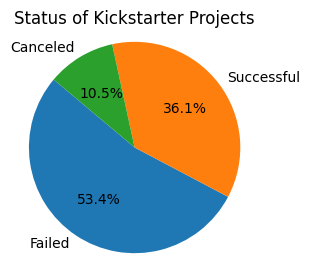

In [0]:
q1_desired_states = ['Successful', 'Failed', 'Canceled']

q1_filtered_df = df[df['State'].isin(q1_desired_states)]

q1_state_counts = q1_filtered_df['State'].value_counts()

plt.figure(figsize=(3, 3))

plt.pie(q1_state_counts, labels=q1_state_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Status of Kickstarter Projects', fontsize=12)

plt.axis('equal')  

plt.show()

I assumed correctly, but wasn't expecting how low it was - only 36.1% make it to funding. 

It's worth mentioning though that some Kickstarter projects _only just_ fail, but they'll still come as a fail. But that's how Kickstarter works. You want $1000 and only make $999? To them, that project failed, and **nothing** is funded. Brutal.

### Of the failures, how many were close?

This is the brutal question I guess, but my morbid curiosity wants to know. How many got $1 off the fateful funding? I'll apply a percentage to this of all the failures, and how far off they were based on a percentage.

In [0]:
q2_filtered_df = df[df['State'] == 'Failed'].copy()

q2_filtered_df['funding_percentage'] = ((q2_filtered_df['Pledged'] / q2_filtered_df['Goal']) * 100).round(0)

This will be hard to read - let's add some ranges of funding.

In [0]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

q2_filtered_df['funding_range'] = pd.cut(q2_filtered_df['funding_percentage'], bins=bins, labels=labels, right=False)

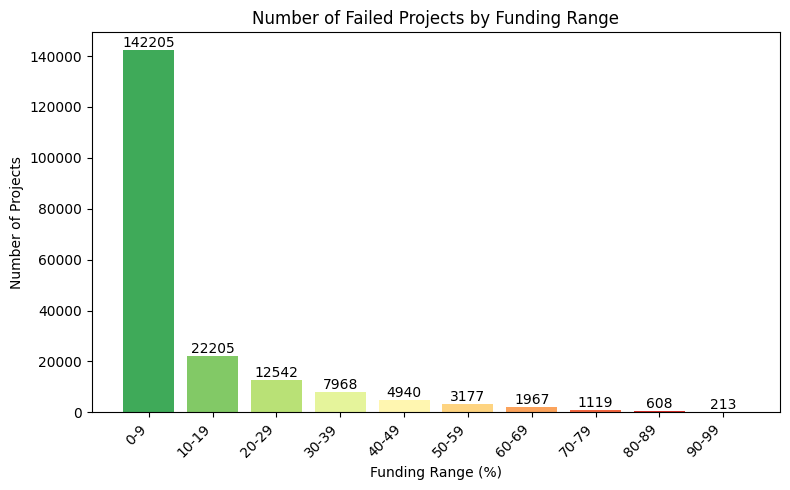

In [0]:
range_counts = q2_filtered_df['funding_range'].value_counts().sort_index()

num_bars = len(range_counts)
colors = cm.RdYlGn_r(np.linspace(0.15, 1, num_bars))

plt.figure(figsize=(8, 5))
bars = plt.bar(range_counts.index, range_counts.values, color=colors)

plt.xlabel('Funding Range (%)')
plt.ylabel('Number of Projects')
plt.title('Number of Failed Projects by Funding Range')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

Ouch, so those 213 were SO close. And there's some that were ridiculously close, like Citizens of the Planet - Live Experience, only $837 off after nearly $10,000 raised. That's gotta sting. 

In [0]:
display(q2_filtered_df.loc[q2_filtered_df['ID'] == 865653284])

ID Name Category Subcategory Country Launched Deadline Goal Pledged Backers State state_flag funding_percentage funding_range 865653284 Citizens of the Planet - Live Experience Music Music United States 2013-02-08T01:55:14.000Z 2013-03-10T00:00:00.000Z 100000 99136 592 Failed -1 99.0 90-99